In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

# np.random.seed(42)
from sklearn.metrics import confusion_matrix

import keras
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import cv2
from keras.models import load_model

In [3]:
from keras.layers import BatchNormalization

In [16]:
dataset = pd.read_csv('C:/Users/jesse/OneDrive/Desktop/Year 4/Project/project_dataset/HAM10000_metadata.csv')

In [2]:
dataset = pd.read_csv('project_dataset/HAM10000_metadata.csv')

In [5]:
SIZE = 64

In [3]:
dataset['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

In [19]:
labEnc = LabelEncoder()
labEnc.fit(dataset['dx'])
LabelEncoder()
print(list(labEnc.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [24]:
dataset['label'] = labEnc.transform(dataset["dx"])
dataset.sample(10)

label
5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: count, dtype: int64

C:\Users\jesse\AppData\Local\Temp\ipykernel_10656\3833127473.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red')


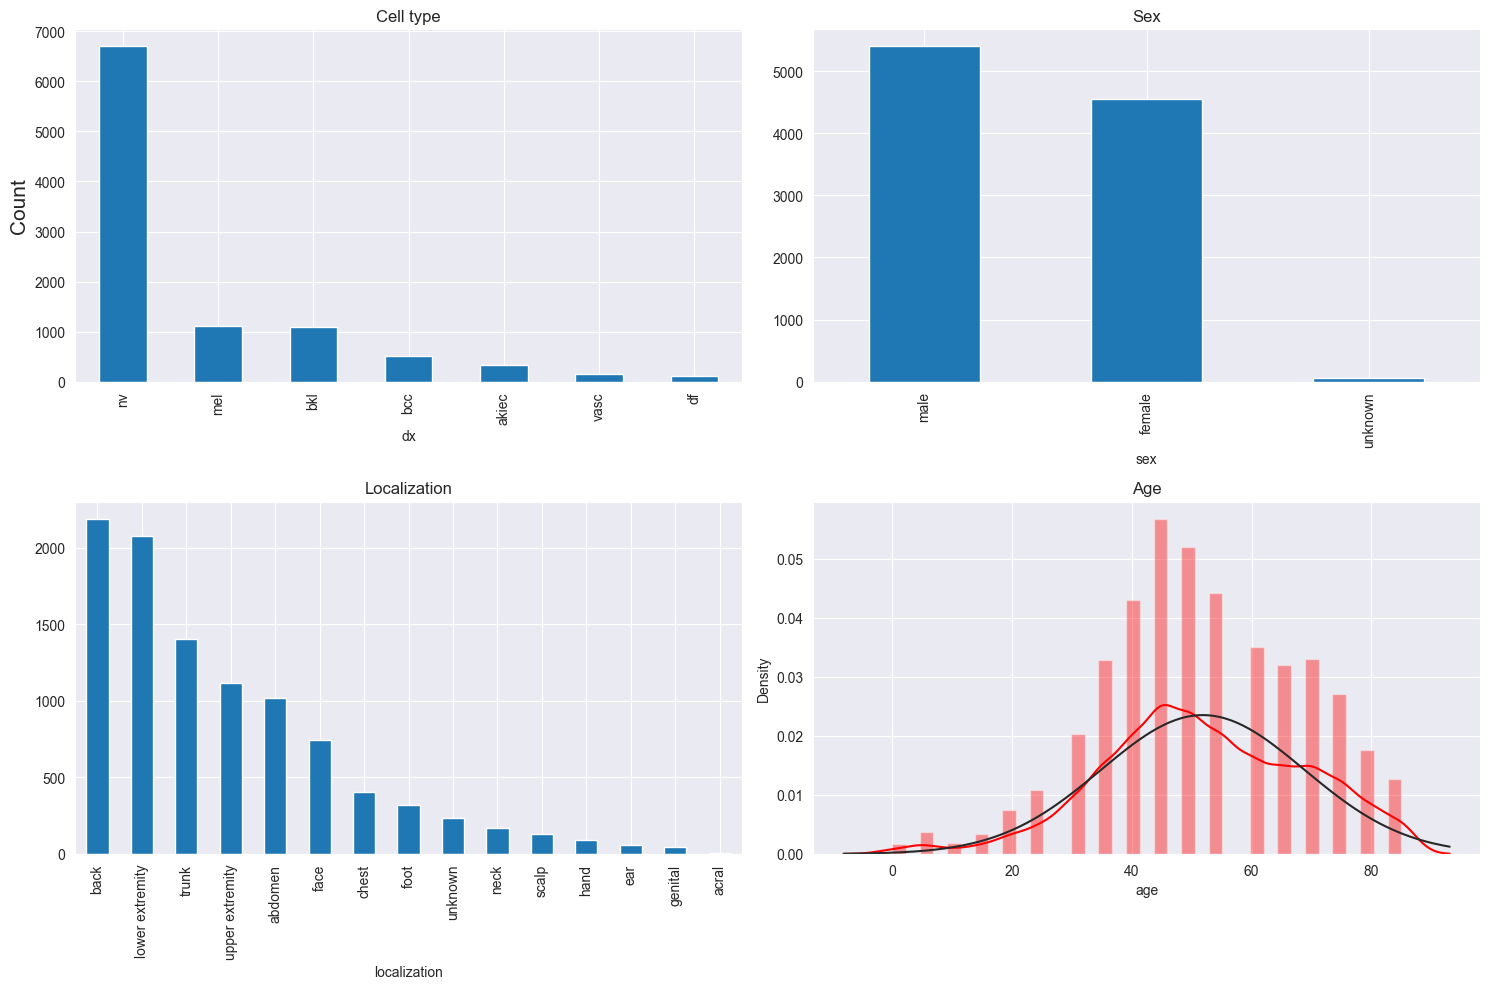

In [10]:
# Data distribution visualization
# Data distribution visualization
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
dataset['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell type')

ax2 = fig.add_subplot(222)
dataset['sex'].value_counts().plot(kind='bar', ax=ax2)
ax1.set_ylabel('Count', size=15)
ax2.set_title('Sex')

ax3 = fig.add_subplot(223)
dataset['localization'].value_counts().plot(kind='bar', ax=ax3)
ax1.set_ylabel('Count', size=15)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age = dataset[pd.notnull(dataset['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red')
ax4.set_title('Age')


plt.tight_layout()
plt.show()

In [11]:
# Data distribution
dataset['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

In [12]:
# Dataset is imbalanced, resample the classes to remove the imbalance (CHECK OTHER METHODS LIKE WEIGHTED TRAINING)
ds_0 = dataset[dataset['label'] == 0]
ds_1 = dataset[dataset['label'] == 1]
ds_2 = dataset[dataset['label'] == 2]
ds_3 = dataset[dataset['label'] == 3]
ds_4 = dataset[dataset['label'] == 4]
ds_5 = dataset[dataset['label'] == 5]
ds_6 = dataset[dataset['label'] == 6]

sample_num = 500
ds_0_balanced = resample(ds_0, replace=True, n_samples=sample_num, random_state=42)
ds_1_balanced = resample(ds_1, replace=True, n_samples=sample_num, random_state=42)
ds_2_balanced = resample(ds_2, replace=True, n_samples=sample_num, random_state=42)
ds_3_balanced = resample(ds_3, replace=True, n_samples=sample_num, random_state=42)
ds_4_balanced = resample(ds_4, replace=True, n_samples=sample_num, random_state=42)
ds_5_balanced = resample(ds_5, replace=True, n_samples=sample_num, random_state=42)
ds_6_balanced = resample(ds_6, replace=True, n_samples=sample_num, random_state=42)

# Combine the datasets together
dataset_balanced = pd.concat([ds_0_balanced, ds_1_balanced, ds_2_balanced, ds_3_balanced, ds_4_balanced, ds_5_balanced, ds_6_balanced])

In [13]:
# Check new distribution
dataset_balanced['label'].value_counts()

label
0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: count, dtype: int64

In [14]:
# Read images based on the image ID from the csv file
image_path = {os.path.splitext(os.path.basename(x))[0]: x
    for x in glob(os.path.join('all_images/', '*.jpg'))}

In [15]:
image_path

{'ISIC_0024306': 'all_images\\ISIC_0024306.jpg',
 'ISIC_0024307': 'all_images\\ISIC_0024307.jpg',
 'ISIC_0024308': 'all_images\\ISIC_0024308.jpg',
 'ISIC_0024309': 'all_images\\ISIC_0024309.jpg',
 'ISIC_0024310': 'all_images\\ISIC_0024310.jpg',
 'ISIC_0024311': 'all_images\\ISIC_0024311.jpg',
 'ISIC_0024312': 'all_images\\ISIC_0024312.jpg',
 'ISIC_0024313': 'all_images\\ISIC_0024313.jpg',
 'ISIC_0024314': 'all_images\\ISIC_0024314.jpg',
 'ISIC_0024315': 'all_images\\ISIC_0024315.jpg',
 'ISIC_0024316': 'all_images\\ISIC_0024316.jpg',
 'ISIC_0024317': 'all_images\\ISIC_0024317.jpg',
 'ISIC_0024318': 'all_images\\ISIC_0024318.jpg',
 'ISIC_0024319': 'all_images\\ISIC_0024319.jpg',
 'ISIC_0024320': 'all_images\\ISIC_0024320.jpg',
 'ISIC_0024321': 'all_images\\ISIC_0024321.jpg',
 'ISIC_0024322': 'all_images\\ISIC_0024322.jpg',
 'ISIC_0024323': 'all_images\\ISIC_0024323.jpg',
 'ISIC_0024324': 'all_images\\ISIC_0024324.jpg',
 'ISIC_0024325': 'all_images\\ISIC_0024325.jpg',
 'ISIC_0024326': 'al

In [16]:
# Define the path and add as a new column
dataset_balanced['path'] = dataset['image_id'].map(image_path.get)

#use the path to read images, then convert them to 64,64 then add them to a new column called image
dataset_balanced['image'] = dataset_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [17]:
# check the output
dataset_balanced.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path,image
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0,all_images\ISIC_0026645.jpg,"[[[150, 112, 104], [160, 125, 116], [162, 127,..."
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0,all_images\ISIC_0025780.jpg,"[[[139, 80, 89], [131, 68, 71], [131, 66, 67],..."
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0,all_images\ISIC_0024450.jpg,"[[[92, 60, 61], [128, 91, 93], [158, 121, 120]..."
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,all_images\ISIC_0027896.jpg,"[[[197, 141, 171], [204, 148, 174], [201, 142,..."
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0,all_images\ISIC_0029268.jpg,"[[[200, 176, 199], [206, 178, 201], [202, 171,..."


In [19]:
# Concert dataframe image attributes into a numpy array
X = np.asarray(dataset_balanced['image'].tolist())
# Scale values between 0-1 by dividing by the highest possible value (255)
X = X/255
# assign label values (what we are trying to predict) to Y, label is used instead of dx because label is an integer and the computer won't understand dx
Y = dataset_balanced['label']
# Convert to categorical as this is multiclass classification
Y_cat = to_categorical(Y,num_classes = 7)
# make training and testing partitions
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

In [20]:
# Define the model

model = Sequential()
model.add(Conv2D(256, (3,3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 128)       0

In [21]:
# Train the model and plot the performance
batch_size = 16
epochs = 50
logdir='logs'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(
    x_train, y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(x_test, y_test), 
    verbose=2, 
    callbacks=[tensorboard_callback])

Epoch 1/50
165/165 - 20s - loss: 1.8860 - acc: 0.1890 - val_loss: 1.8103 - val_acc: 0.2560 - 20s/epoch - 123ms/step
Epoch 2/50
165/165 - 19s - loss: 1.7105 - acc: 0.2903 - val_loss: 1.5437 - val_acc: 0.3794 - 19s/epoch - 117ms/step
Epoch 3/50
165/165 - 20s - loss: 1.5547 - acc: 0.3657 - val_loss: 1.4828 - val_acc: 0.3897 - 20s/epoch - 123ms/step
Epoch 4/50
165/165 - 20s - loss: 1.5190 - acc: 0.3954 - val_loss: 1.4798 - val_acc: 0.3886 - 20s/epoch - 118ms/step
Epoch 5/50
165/165 - 20s - loss: 1.4124 - acc: 0.4377 - val_loss: 1.3686 - val_acc: 0.4343 - 20s/epoch - 123ms/step
Epoch 6/50
165/165 - 20s - loss: 1.3447 - acc: 0.4659 - val_loss: 1.2963 - val_acc: 0.4846 - 20s/epoch - 119ms/step
Epoch 7/50
165/165 - 20s - loss: 1.2711 - acc: 0.5185 - val_loss: 1.4969 - val_acc: 0.4160 - 20s/epoch - 118ms/step
Epoch 8/50
165/165 - 20s - loss: 1.3431 - acc: 0.4770 - val_loss: 1.2207 - val_acc: 0.4960 - 20s/epoch - 120ms/step
Epoch 9/50
165/165 - 20s - loss: 1.1801 - acc: 0.5543 - val_loss: 1.2237

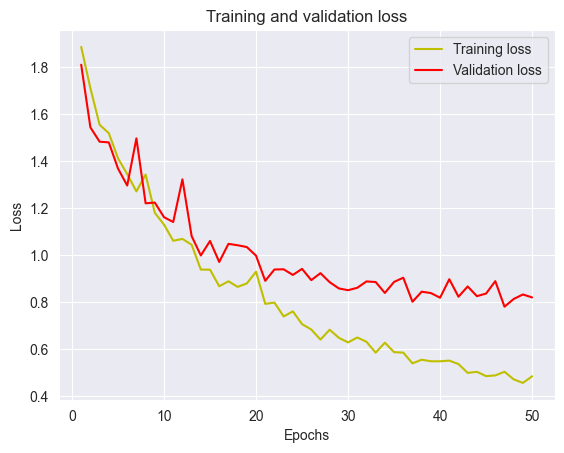

In [22]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y', label='Training loss')
plt.plot(epochs,val_loss,'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

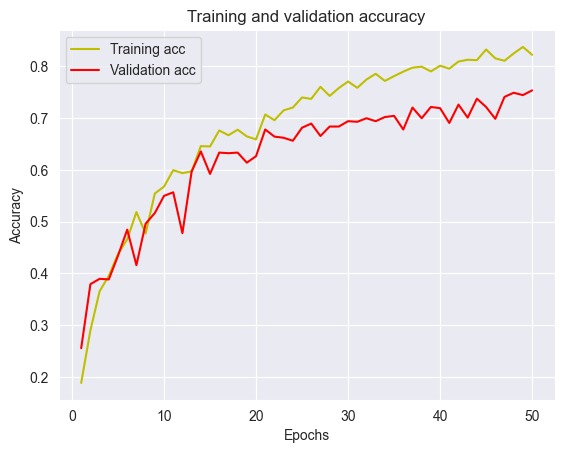

In [23]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
plt.plot(epochs,acc,'y', label='Training acc')
plt.plot(epochs,val_acc,'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [2]:
# save the model for future use
#model.save(os.path.join('models', 'model50epochs500resample64size.h5'))

# load the model if you want to use it again
new_model = load_model(os.path.join('models', 'SequentialRelu50epochs1500resample64size.keras'))


In [4]:
new_model = load_model(os.path.join('models', 'Densenetmodel50epochs1500resample224size.keras'))

C:\Users\jesse\scoop\apps\python\current\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1210 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [11]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1920)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │        13,447 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,548,183 (208.08 MB)

 Trainable params: 18,106,375 (69.07 MB)

 Non-trainable params: 229,056 (894.75 KB)

 Optimizer params: 36,212,752 (138.14 MB)

In [8]:
new_model.save_weights('models/densenetmodelweights.weights.h5')

In [10]:
from keras.src.saving.saving_api import load_weights

model_weights = load_weights(new_model, 'models/densenetmodelweights.weights.h5')

In [25]:
#model.save(os.path.join('models', 'model50epochs500resample64size.keras'))

In [12]:
# how to test the model on new dermascopic images

# Two ways read new image and resize it to what your model has been trained on
# The first way
#img = cv2.imread('filename.jpg')
#resize = tf.image.resize(img, (SIZE, SIZE))

# The second way
img2 = Image.open(os.path.join('extra_test_images', 'df2.jpg'))
img2 = tf.image.resize(img2, (SIZE, SIZE))

# turn the image into a numpy array because the model expects and array not a single image, also scale the image between 0-1 by dividing it by 255
img2 = np.expand_dims(img2/255, axis=0)

prediction = new_model.predict(img2)

# Print the prediction
class_labels = ['Class 0 (akiec)', 'Class 1 (bcc)', 'Class 2 (bkl)', 'Class 3 (df)', 'Class 4 (mel)', 'Class 5 (nv)', 'Class 6 (vasc)']
predicted_label = class_labels[prediction.argmax()]

predicted_label

1/1 [==============================] - 0s 18ms/step


'Class 0 (akiec)'

In [2]:
model = load_model(os.path.join('models', 'Densenetmodel50epochs1500resample224size.keras'))
svm = joblib.load(os.path.join('models', 'svm_model.joblib'))

C:\Users\jesse\scoop\apps\python\current\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1210 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [32]:
img = Image.open(os.path.join('extra_test_images', 'df2.jpg'))
img = tf.image.resize(img, (224, 224))

img = np.expand_dims(img/255, axis=0)

features = model.predict(img)

prediction = svm.predict(features)

class_labels = ['Class 0 (akiec)', 'Class 1 (bcc)', 'Class 2 (bkl)', 'Class 3 (df)', 'Class 4 (mel)', 'Class 5 (nv)', 'Class 6 (vasc)']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


In [13]:
class_labels[prediction[0]]

'Class 2 (bkl)'

In [30]:
img = Image.open(os.path.join('extra_test_images', 'df2.jpg'))
img = tf.image.resize(img, (224, 224))

img = np.expand_dims(img/255, axis=0)

prediction = model.predict(img)

class_labels = ['Class 0 (akiec)', 'Class 1 (bcc)', 'Class 2 (bkl)', 'Class 3 (df)', 'Class 4 (mel)', 'Class 5 (nv)', 'Class 6 (vasc)']
predicted_label = 'Predicted class is: ' + str(class_labels[prediction.argmax()]) + '. With a confidence of ' + str(prediction[0, prediction.argmax()]) + '.'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


In [24]:
score = prediction[0, prediction.argmax()]
score

0.7439585

In [31]:
#prediction[0,prediction.argmax()]
#max(prediction[0,])
predicted_label

'Predicted class is: Class 2 (bkl). With a confidence of 0.7186307.'

In [ ]:
# 5-nv    6705
# 4-mel    1113
# 2-bkl    1099
# 1-bcc     514
# 0-akiec     327
# 6-vasc     142
# 3-df     115

In [ ]:
# help from https://youtu.be/jztwpsIzEGc?si=Rl_yo0-TXoo3GkDs , https://youtu.be/fyZ9Rxpoz2I?si=8cZMSgLrJkiN3oEM